In [54]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import visualize_transition, plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
import numpy as np

In [6]:
sim = AerSimulator()

$Deny = 0$\
$Refuse = 1$

In [38]:
def add_player_fair(label=None):
    player = QuantumCircuit(1, name=label if label else "")
    player.h(0)
    return player

In [82]:
def measure(circuit):
    result = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
    display(plot_histogram(result))

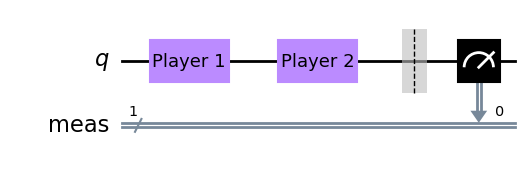

In [118]:
player_1 = add_player_fair("Player 1")
player_2 = add_player_fair("Player 2")

qc = QuantumCircuit(1)
qc.append(player_1, [0])
qc.append(player_2, [0])
qc.measure_all()
qc.draw('mpl', style="clifford")

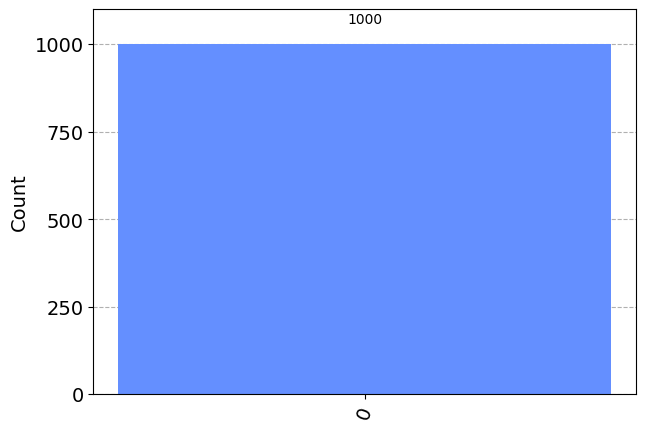

In [119]:
measure(qc)

Using 50% of chance for both, the default result is refuse, which make sense by the default game theory

In [58]:
(np.sin(np.pi/2/2))**2 + (np.cos(np.pi/2/2))**2

1.0

In [75]:
assert np.round(np.rad2deg(np.arcsin(np.sqrt(50/100))*2))  == np.rad2deg(np.pi/2)

In [80]:
def add_player_unfair(rate_to_refuse, label=None):
    # cos(theta/2)|0>      sin(theta/2)|1>
    # (cos(theta/2))^2  + (sin(theta/2))^2 = 1

    # 50% --> (cos(180/2/2))^2 + (sin(180/2/2))^2 = 1
    # 50/100 = (sin(180/2/2))^2
    # sqrt(50)/sqrt(100) = sin(180/2/2)
    # arcsin(sqrt(50)/sqrt(100)) * 2 = 180/2
    theta = np.arcsin(np.sqrt(rate_to_refuse/100))*2
    player = QuantumCircuit(1, name=label if label else "")
    player.ry(theta, 0)
    return player

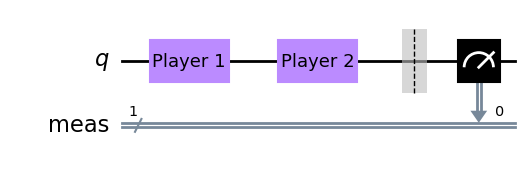

In [120]:
player_1 = add_player_unfair(50, label="Player 1")
player_2 = add_player_unfair(20, label="Player 2")

qc = QuantumCircuit(1)
qc.append(player_1, [0])
qc.append(player_2, [0])
qc.measure_all()
qc.draw('mpl', style="clifford")

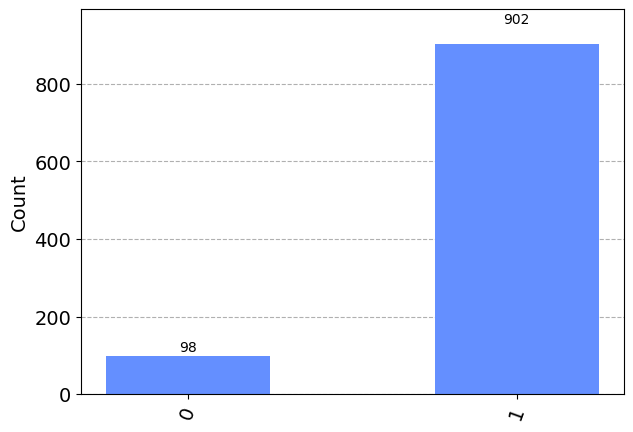

In [121]:
measure(qc)